In [ ]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  pfb2t1c2pfb poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  tex-common tex-gyre texlive-base texlive-binaries texlive-fonts-recommended
  texlive-latex-base texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-fram

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['text.usetex'] = True

<ipython-input-24-6c2211d03463>:87: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


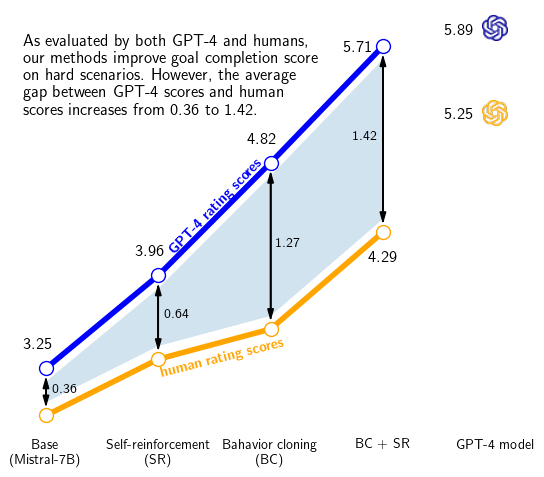

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def draw_double_headed_arrow(x1, y1, x2, y2, plt):
    plt.arrow(x1, y1, x2 - x1, y2 - y1, head_width=0.05, facecolor="black", length_includes_head=True)
    plt.arrow(x2, y2, x1 - x2, y1 - y2, head_width=0.05, facecolor="black", length_includes_head=True)



all_goal_dim = np.array([3.25, 3.96, 4.82, 5.71])
human_gap = np.array([0.36, 0.64, 1.27, 1.42])
# auto_eval_goal = [3.25, 4.36, 4.82, 5.71]
# human_eval_overall = [1.04, 1.39, 1.61, 1.71]
# auto_eval_overall = [1.88, 2.36, 2.58, 2.80]

x_axis = ['Base\n (Mistral-7B)', 'Self-reinforcement\n (SR)', 'Bahavior cloning\n (BC)', 'BC + SR', 'GPT-4 model']
fig, ax = plt.subplots(figsize=(6.2, 5), layout="constrained")


# plot goal and overall with two different colors
plt.plot(x_axis[:-1], all_goal_dim, label='Human goal-achieving score', color='blue',
         marker=".", linewidth=4, markersize=20, markerfacecolor='white')
for x, y in zip(range(4), all_goal_dim):
    if x < 3:
        ax.text(x-0.08, y + 0.15, str(y), ha="center", fontsize="large", family="sans-serif")
    else:
        ax.text(x-0.1, y + 0.05, str(y), ha="right", va="top", fontsize="large", family="sans-serif")
ax.fill_between(x_axis[:-1], all_goal_dim - human_gap + 0.10, all_goal_dim - 0.10, alpha=0.2)
plt.plot(x_axis[:-1], all_goal_dim - human_gap, label='Human goal-achieving score', color='orange',
         marker=".", linewidth=4, markersize=20, markerfacecolor='white')

draw_double_headed_arrow(3, all_goal_dim[-1] - 0.08, 3, all_goal_dim[-1] - human_gap[-1] + 0.08, plt)
draw_double_headed_arrow(0, all_goal_dim[0] - 0.08, 0, all_goal_dim[0] - human_gap[0] + 0.08, plt)
draw_double_headed_arrow(1, all_goal_dim[1] - 0.08, 1, all_goal_dim[1] - human_gap[1] + 0.08, plt)
draw_double_headed_arrow(2, all_goal_dim[2] - 0.08, 2, all_goal_dim[2] - human_gap[2] + 0.08, plt)

for i in range(4):
    if i < 3:
        ax.text(i + 0.05, all_goal_dim[i] - 0.5 * human_gap[i], str(human_gap[i]))
    else:
        ax.text(i - 0.05, all_goal_dim[i] - 0.5 * human_gap[i], str(human_gap[i]), ha="right")

for x, y in zip(range(4), all_goal_dim - human_gap):
    if x == 3:
        ax.text(x, y - 0.22, "{:.2f}".format(y), ha="center", fontsize="large", family="sans-serif")
    else:
        pass

ax.text(-0.2, 5.8,
        """As evaluated by both GPT-4 and humans,
our methods improve goal completion score
on hard scenarios. However, the average
gap between GPT-4 scores and human
scores increases from 0.36 to 1.42.""", ha="left", va="top", fontsize="12")

ax.text(1.51, 4.49, r"\textbf{GPT-4 rating scores}", ha="center", va="center",
        rotation=46, color="blue")
ax.text(1.57, 3.33, r"\textbf{human rating scores}", ha="center", va="center",
        rotation=14.1, color="orange")

ax.set_xticks(range(len(x_axis)))
ax.set_xticklabels(x_axis, ha="center")
labels = ax.get_xticklabels()  # Get all the x-tick labels
#if labels:  # Check if the list is not empty
#    labels[-1].set_ha('left')
#ax.text(4, 1, "GPT-4", ha='center', va='bottom', fontsize='large', family='sans-serif')

icon1 = plt.imread('blue_openai.png')
imagebox1 = OffsetImage(icon1, zoom=0.85)
ab1 = AnnotationBbox(imagebox1, (4, 5.85), xycoords='data', frameon=False)
ax.add_artist(ab1)

icon2 = plt.imread('orange_openai.png')
imagebox2 = OffsetImage(icon2, zoom=0.85)
ab2 = AnnotationBbox(imagebox2, (4, 5.2), xycoords='data', frameon=False)
ax.add_artist(ab2)

ax.text(4-0.2, 5.89, str(5.89), ha="right", va="top", fontsize="large", family="sans-serif")
ax.text(4-0.2, 5.25, str(5.25), ha="right", va="top", fontsize="large", family="sans-serif")

ax.get_yaxis().set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig("model_performance.pdf")